In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df=pd.read_csv('Downloads/Wholesale+Customers+Data.csv')

In [3]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [5]:
df.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [6]:
df['Channel'].value_counts()

Hotel     298
Retail    142
Name: Channel, dtype: int64

In [7]:
df['Region'].value_counts()

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

In [8]:
df['Total spent']=df['Fresh']+df['Milk']+df['Grocery']+df['Frozen']+df['Detergents_Paper']+df['Delicatessen']

In [9]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total spent
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


## 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [10]:
df.describe(include='all')

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total spent
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000


In [11]:
df.groupby('Region')['Total spent'].sum()

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Total spent, dtype: int64

Text(0, 0.5, 'Total spent')

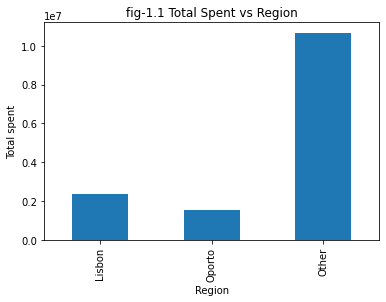

In [12]:
df.groupby('Region')['Total spent'].sum().plot(kind='bar');
plt.title('fig-1.1 Total Spent vs Region')
plt.ylabel('Total spent')

In [13]:
df.groupby('Channel')['Total spent'].sum()

Channel
Hotel     7999569
Retail    6619931
Name: Total spent, dtype: int64

Text(0, 0.5, 'Total spent')

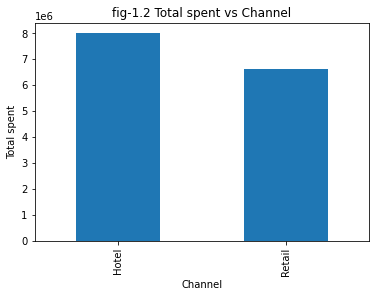

In [14]:
df.groupby('Channel')['Total spent'].sum().plot(kind='bar')
plt.title('fig-1.2 Total spent vs Channel')
plt.ylabel('Total spent')

## 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [15]:
df_fresh=df.groupby('Region')['Fresh']
df_fresh_des=df_fresh.describe().T
df_fresh_des.loc['Total',:]=df_fresh.sum()
df_fresh_des.loc['CV',:]=df_fresh_des.loc['std',:]/df_fresh_des.loc['mean',:]
df_fresh_des

Region,Lisbon,Oporto,Other
count,77.000000,47.000000,3.160000e+02
mean,11101.727273,9887.680851,1.253347e+04
std,11557.438575,8387.899211,1.338921e+04
min,18.000000,3.000000,3.000000e+00
25%,2806.000000,2751.500000,3.350750e+03
50%,7363.000000,8090.000000,8.752500e+03
75%,15218.000000,14925.500000,1.740650e+04
max,56083.000000,32717.000000,1.121510e+05
Total,854833.000000,464721.000000,3.960577e+06
CV,1.041049,0.848318,1.068277e+00


In [16]:
df_milk=df.groupby('Region')['Milk']
df_milk_des=df_milk.describe().T
df_milk_des.loc['Total',:]=df_milk.sum()
df_milk_des.loc['CV',:]=df_milk_des.loc['std',:]/df_milk_des.loc['mean',:]
df_milk_des

Region,Lisbon,Oporto,Other
count,77.000000,47.000000,3.160000e+02
mean,5486.415584,5088.170213,5.977085e+03
std,5704.856079,5826.343145,7.935463e+03
min,258.000000,333.000000,5.500000e+01
25%,1372.000000,1430.500000,1.634000e+03
50%,3748.000000,2374.000000,3.684500e+03
75%,7503.000000,5772.500000,7.198750e+03
max,28326.000000,25071.000000,7.349800e+04
Total,422454.000000,239144.000000,1.888759e+06
CV,1.039815,1.145076,1.327648e+00


In [17]:
df_grocery=df.groupby('Region')['Grocery']
df_grocery_des=df_grocery.describe().T
df_grocery_des.loc['Total',:]=df_grocery.sum()
df_grocery_des.loc['CV',:]=df_grocery_des.loc['std',:]/df_grocery_des.loc['mean',:]
df_grocery_des

Region,Lisbon,Oporto,Other
count,77.000000,47.000000,3.160000e+02
mean,7403.077922,9218.595745,7.896364e+03
std,8496.287728,10842.745314,9.537288e+03
min,489.000000,1330.000000,3.000000e+00
25%,2046.000000,2792.500000,2.141500e+03
50%,3838.000000,6114.000000,4.732000e+03
75%,9490.000000,11758.500000,1.055975e+04
max,39694.000000,67298.000000,9.278000e+04
Total,570037.000000,433274.000000,2.495251e+06
CV,1.147670,1.176182,1.207808e+00


In [18]:
df_frozen=df.groupby('Region')['Frozen']
df_frozen_des=df_frozen.describe().T
df_frozen_des.loc['Total',:]=df_frozen.sum()
df_frozen_des.loc['CV',:]=df_frozen_des.loc['std',:]/df_frozen_des.loc['mean',:]
df_frozen_des

Region,Lisbon,Oporto,Other
count,77.000000,47.000000,316.000000
mean,3000.337662,4045.361702,2944.594937
std,3092.143894,9151.784954,4260.126243
min,61.000000,131.000000,25.000000
25%,950.000000,811.500000,664.750000
50%,1801.000000,1455.000000,1498.000000
75%,4324.000000,3272.000000,3354.750000
max,18711.000000,60869.000000,36534.000000
Total,231026.000000,190132.000000,930492.000000
CV,1.030599,2.262291,1.446761


In [19]:
df_detergent=df.groupby('Region')['Detergents_Paper']
df_detergent_des=df_detergent.describe().T
df_detergent_des.loc['Total',:]=df_detergent.sum()
df_detergent_des.loc['CV',:]=df_detergent_des.loc['std',:]/df_detergent_des.loc['mean',:]
df_detergent_des

Region,Lisbon,Oporto,Other
count,77.000000,47.000000,316.000000
mean,2651.116883,3687.468085,2817.753165
std,4208.462708,6514.717668,4593.051613
min,5.000000,15.000000,3.000000
25%,284.000000,282.500000,251.250000
50%,737.000000,811.000000,856.000000
75%,3593.000000,4324.500000,3875.750000
max,19410.000000,38102.000000,40827.000000
Total,204136.000000,173311.000000,890410.000000
CV,1.587430,1.766718,1.630040


In [20]:
df_delicate=df.groupby('Region')['Delicatessen']
df_delicate_des=df_delicate.describe().T
df_delicate_des.loc['Total',:]=df_delicate.sum()
df_delicate_des.loc['CV',:]=df_delicate_des.loc['std',:]/df_delicate_des.loc['mean',:]
df_delicate_des

Region,Lisbon,Oporto,Other
count,77.000000,47.000000,316.000000
mean,1354.896104,1159.702128,1620.601266
std,1345.423340,1050.739841,3232.581660
min,7.000000,51.000000,3.000000
25%,548.000000,540.500000,402.000000
50%,806.000000,898.000000,994.000000
75%,1775.000000,1538.500000,1832.750000
max,6854.000000,5609.000000,47943.000000
Total,104327.000000,54506.000000,512110.000000
CV,0.993008,0.906043,1.994680


In [21]:
df_fresh1=df.groupby('Channel')['Fresh']
df_fresh1_des=df_fresh1.describe().T
df_fresh1_des.loc['Total',:]=df_fresh1.sum()
df_fresh1_des.loc['CV',:]=df_fresh1_des.loc['std',:]/df_fresh1_des.loc['mean',:]
df_fresh1_des

Channel,Hotel,Retail
count,2.980000e+02,1.420000e+02
mean,1.347556e+04,8.904324e+03
std,1.383169e+04,8.987715e+03
min,3.000000e+00,1.800000e+01
25%,4.070250e+03,2.347750e+03
50%,9.581500e+03,5.993500e+03
75%,1.827475e+04,1.222975e+04
max,1.121510e+05,4.446600e+04
Total,4.015717e+06,1.264414e+06
CV,1.026428e+00,1.009365e+00


In [22]:
df_milk1=df.groupby('Channel')['Milk']
df_milk1_des=df_milk1.describe().T
df_milk1_des.loc['Total',:]=df_milk1.sum()
df_milk1_des.loc['CV',:]=df_milk1_des.loc['std',:]/df_milk1_des.loc['mean',:]
df_milk1_des

Channel,Hotel,Retail
count,2.980000e+02,1.420000e+02
mean,3.451725e+03,1.071650e+04
std,4.352166e+03,9.679631e+03
min,5.500000e+01,9.280000e+02
25%,1.164500e+03,5.938000e+03
50%,2.157000e+03,7.812000e+03
75%,4.029500e+03,1.216275e+04
max,4.395000e+04,7.349800e+04
Total,1.028614e+06,1.521743e+06
CV,1.260867e+00,9.032456e-01


In [23]:
df_grocery1=df.groupby('Channel')['Grocery']
df_grocery1_des=df_grocery1.describe().T
df_grocery1_des.loc['Total',:]=df_grocery1.sum()
df_grocery1_des.loc['CV',:]=df_grocery1_des.loc['std',:]/df_grocery1_des.loc['mean',:]
df_grocery1_des

Channel,Hotel,Retail
count,2.980000e+02,1.420000e+02
mean,3.962138e+03,1.632285e+04
std,3.545513e+03,1.226732e+04
min,3.000000e+00,2.743000e+03
25%,1.703750e+03,9.245250e+03
50%,2.684000e+03,1.239000e+04
75%,5.076750e+03,2.018350e+04
max,2.104200e+04,9.278000e+04
Total,1.180717e+06,2.317845e+06
CV,8.948486e-01,7.515426e-01


In [24]:
df_frozen1=df.groupby('Channel')['Frozen']
df_frozen1_des=df_frozen1.describe().T
df_frozen1_des.loc['Total',:]=df_frozen1.sum()
df_frozen1_des.loc['CV',:]=df_frozen1_des.loc['std',:]/df_frozen1_des.loc['mean',:]
df_frozen1_des

Channel,Hotel,Retail
count,2.980000e+02,142.000000
mean,3.748252e+03,1652.612676
std,5.643913e+03,1812.803662
min,2.500000e+01,33.000000
25%,8.300000e+02,534.250000
50%,2.057500e+03,1081.000000
75%,4.558750e+03,2146.750000
max,6.086900e+04,11559.000000
Total,1.116979e+06,234671.000000
CV,1.505745e+00,1.096932


In [25]:
df_detergent1=df.groupby('Channel')['Detergents_Paper']
df_detergent1_des=df_detergent1.describe().T
df_detergent1_des.loc['Total',:]=df_detergent1.sum()
df_detergent1_des.loc['CV',:]=df_detergent1_des.loc['std',:]/df_detergent1_des.loc['mean',:]
df_detergent1_des

Channel,Hotel,Retail
count,298.000000,1.420000e+02
mean,790.560403,7.269507e+03
std,1104.093673,6.291090e+03
min,3.000000,3.320000e+02
25%,183.250000,3.683500e+03
50%,385.500000,5.614500e+03
75%,899.500000,8.662500e+03
max,6907.000000,4.082700e+04
Total,235587.000000,1.032270e+06
CV,1.396596,8.654080e-01


In [26]:
df_delicate1=df.groupby('Channel')['Delicatessen']
df_delicate1_des=df_delicate1.describe().T
df_delicate1_des.loc['Total',:]=df_delicate1.sum()
df_delicate1_des.loc['CV',:]=df_delicate1_des.loc['std',:]/df_delicate1_des.loc['mean',:]
df_delicate1_des

Channel,Hotel,Retail
count,298.000000,142.000000
mean,1415.956376,1753.436620
std,3147.426922,1953.797047
min,3.000000,3.000000
25%,379.000000,566.750000
50%,821.000000,1350.000000
75%,1548.000000,2156.000000
max,47943.000000,16523.000000
Total,421955.000000,248988.000000
CV,2.222828,1.114267


Text(0.5, 0, 'Other')

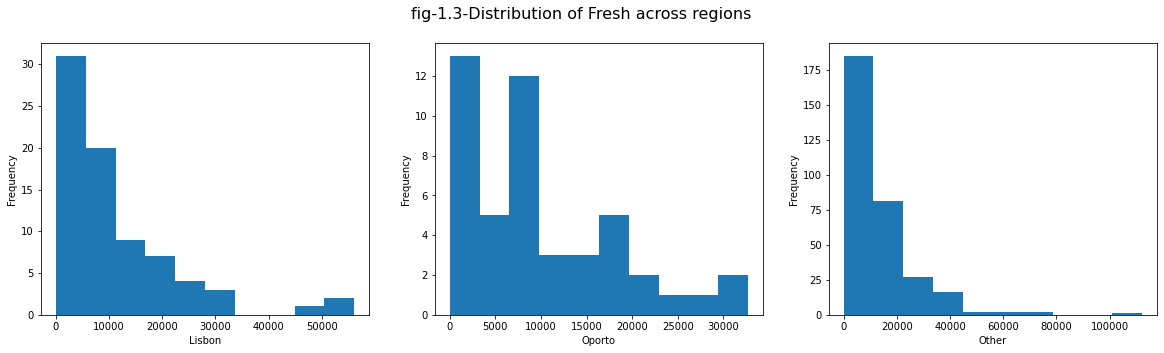

In [27]:
plt.figure(figsize=(20,5))
plt.suptitle('fig-1.3-Distribution of Fresh across regions',fontsize=16)
plt.subplot(1,3,1)
df_fresh.get_group('Lisbon').plot(kind = 'hist');
plt.xlabel('Lisbon')
plt.subplot(1,3,2)
df_fresh.get_group('Oporto').plot(kind = 'hist');
plt.xlabel('Oporto')
plt.subplot(1,3,3)
df_fresh.get_group('Other').plot(kind = 'hist');
plt.xlabel('Other')



Text(0.5, 0, 'Other')

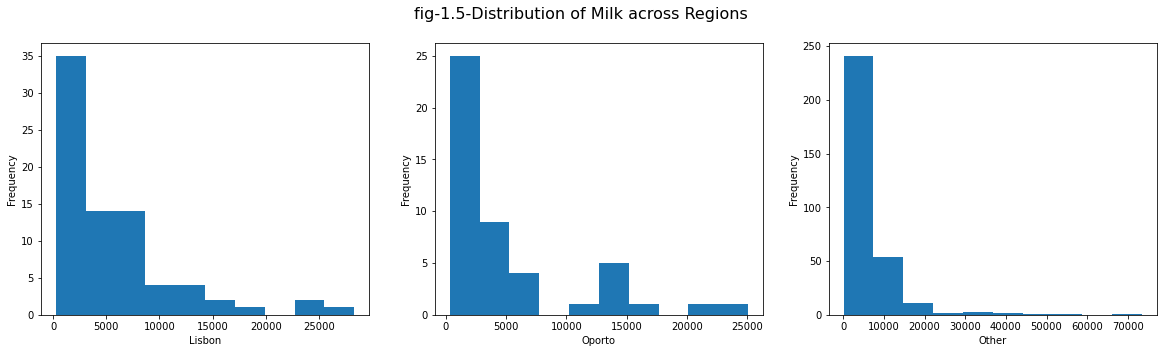

In [28]:
plt.figure(figsize=(20,5))
plt.suptitle('fig-1.5-Distribution of Milk across Regions',fontsize=16)
plt.subplot(1,3,1)
df_milk.get_group('Lisbon').plot(kind = 'hist');
plt.xlabel('Lisbon')
plt.subplot(1,3,2)
df_milk.get_group('Oporto').plot(kind = 'hist');
plt.xlabel('Oporto')
plt.subplot(1,3,3)
df_milk.get_group('Other').plot(kind = 'hist');
plt.xlabel('Other')



Text(0.5, 0, 'Other')

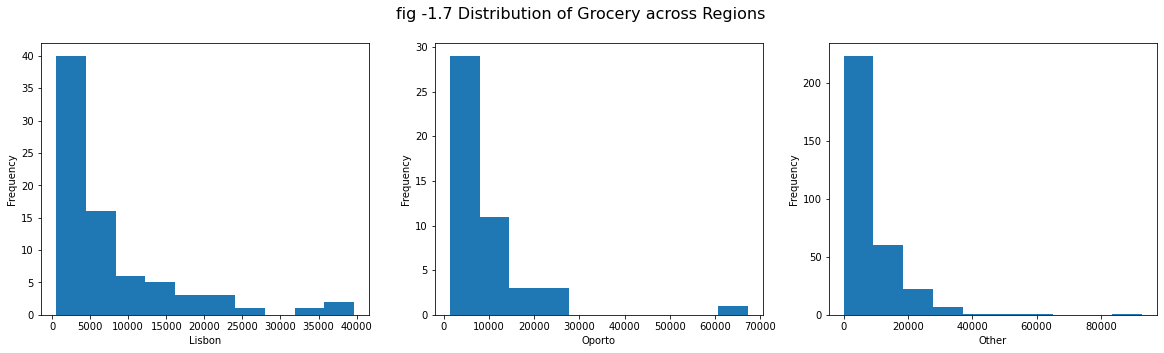

In [29]:
plt.figure(figsize=(20,5))
plt.suptitle('fig -1.7 Distribution of Grocery across Regions',fontsize=16)
plt.subplot(1,3,1)
df_grocery.get_group('Lisbon').plot(kind = 'hist');
plt.xlabel('Lisbon')
plt.subplot(1,3,2)
df_grocery.get_group('Oporto').plot(kind = 'hist');
plt.xlabel('Oporto')
plt.subplot(1,3,3)
df_grocery.get_group('Other').plot(kind = 'hist');
plt.xlabel('Other')



Text(0.5, 0, 'Other')

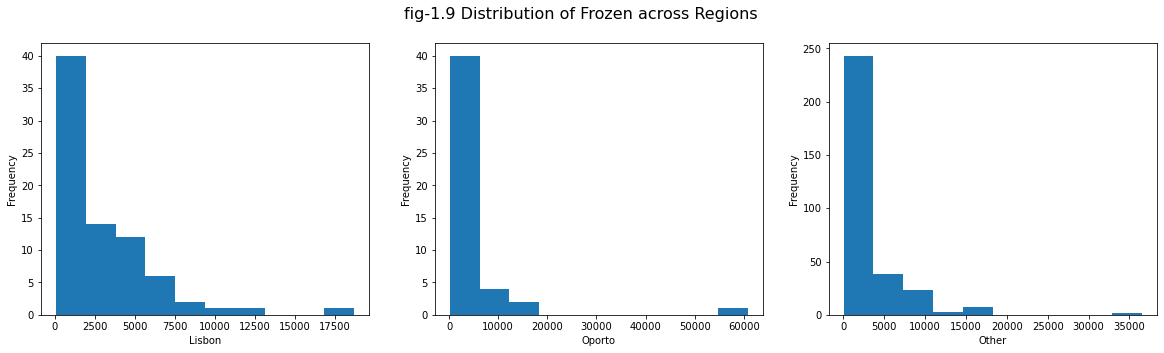

In [30]:
plt.figure(figsize=(20,5))
plt.suptitle('fig-1.9 Distribution of Frozen across Regions',fontsize=16)
plt.subplot(1,3,1)
df_frozen.get_group('Lisbon').plot(kind = 'hist');
plt.xlabel('Lisbon')
plt.subplot(1,3,2)
df_frozen.get_group('Oporto').plot(kind = 'hist');
plt.xlabel('Oporto')
plt.subplot(1,3,3)
df_frozen.get_group('Other').plot(kind = 'hist');
plt.xlabel('Other')



Text(0.5, 0, 'Other')

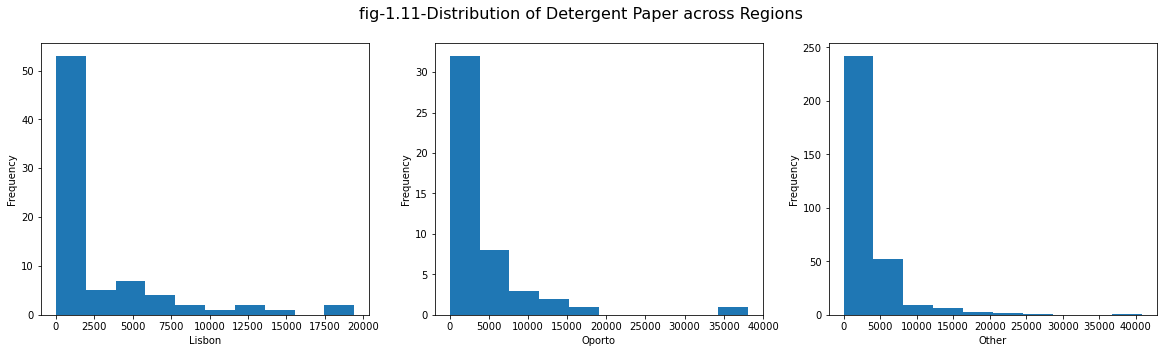

In [31]:
plt.figure(figsize=(20,5))
plt.suptitle('fig-1.11-Distribution of Detergent Paper across Regions',fontsize=16)
plt.subplot(1,3,1)
df_detergent.get_group('Lisbon').plot(kind = 'hist');
plt.xlabel('Lisbon')
plt.subplot(1,3,2)
df_detergent.get_group('Oporto').plot(kind = 'hist');
plt.xlabel('Oporto')
plt.subplot(1,3,3)
df_detergent.get_group('Other').plot(kind = 'hist');
plt.xlabel('Other')



Text(0.5, 0, 'Other')

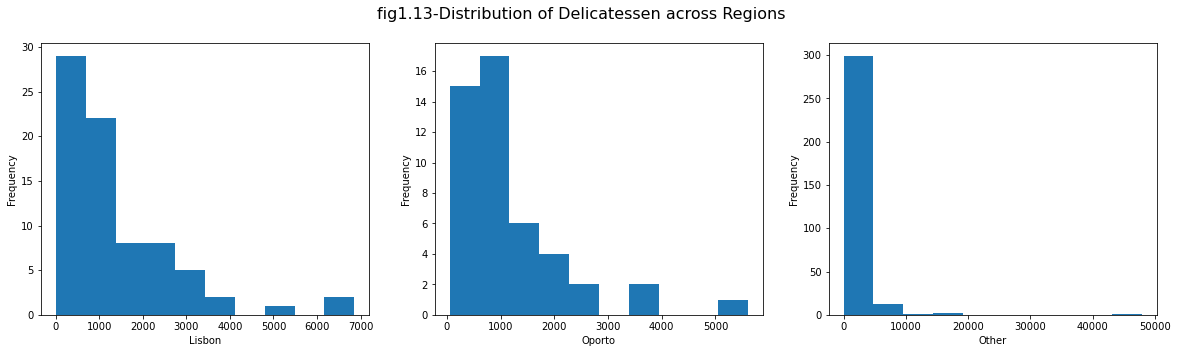

In [32]:
plt.figure(figsize=(20,5))
plt.suptitle('fig1.13-Distribution of Delicatessen across Regions',fontsize=16)
plt.subplot(1,3,1)
df_delicate.get_group('Lisbon').plot(kind = 'hist');
plt.xlabel('Lisbon')
plt.subplot(1,3,2)
df_delicate.get_group('Oporto').plot(kind = 'hist');
plt.xlabel('Oporto')
plt.subplot(1,3,3)
df_delicate.get_group('Other').plot(kind = 'hist');
plt.xlabel('Other')



Text(0.5, 0, 'Retail')

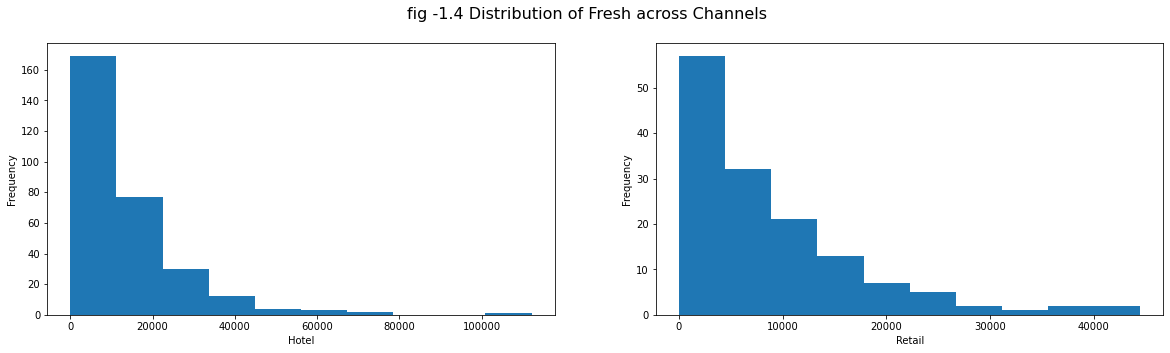

In [33]:
plt.figure(figsize=(20,5))
plt.suptitle('fig -1.4 Distribution of Fresh across Channels',fontsize=16)
plt.subplot(1,2,1)
df_fresh1.get_group('Hotel').plot(kind = 'hist');
plt.xlabel('Hotel')
plt.subplot(1,2,2)
df_fresh1.get_group('Retail').plot(kind = 'hist');
plt.xlabel('Retail')




Text(0.5, 0, 'Retail')

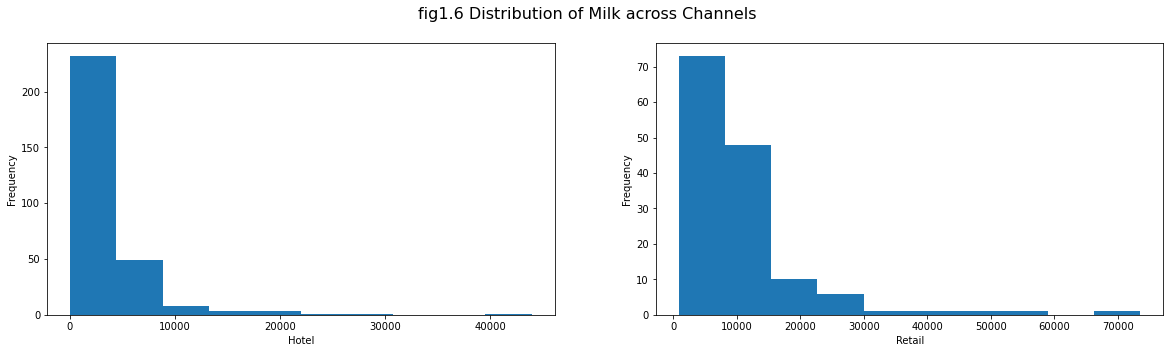

In [34]:
plt.figure(figsize=(20,5))
plt.suptitle('fig1.6 Distribution of Milk across Channels',fontsize=16)
plt.subplot(1,2,1)
df_milk1.get_group('Hotel').plot(kind = 'hist');
plt.xlabel('Hotel')
plt.subplot(1,2,2)
df_milk1.get_group('Retail').plot(kind = 'hist');
plt.xlabel('Retail')


Text(0.5, 0, 'Retail')

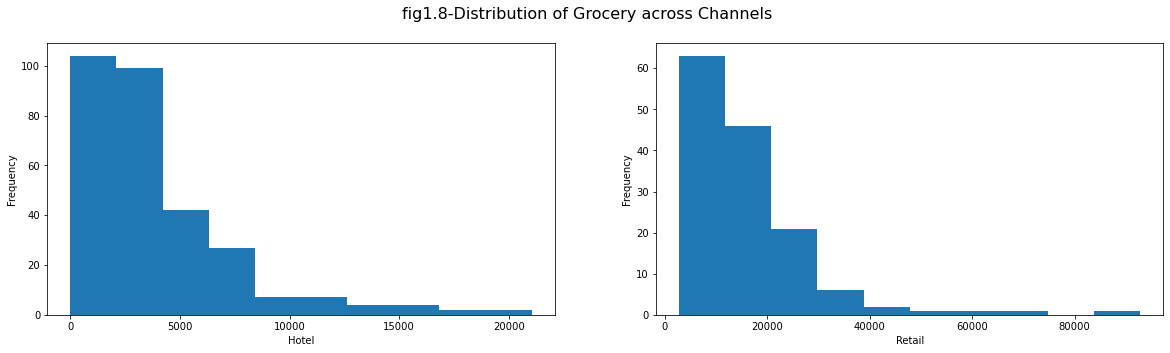

In [35]:
plt.figure(figsize=(20,5))
plt.suptitle('fig1.8-Distribution of Grocery across Channels',fontsize=16)
plt.subplot(1,2,1)
df_grocery1.get_group('Hotel').plot(kind = 'hist');
plt.xlabel('Hotel')
plt.subplot(1,2,2)
df_grocery1.get_group('Retail').plot(kind = 'hist');
plt.xlabel('Retail')


Text(0.5, 0, 'Retail')

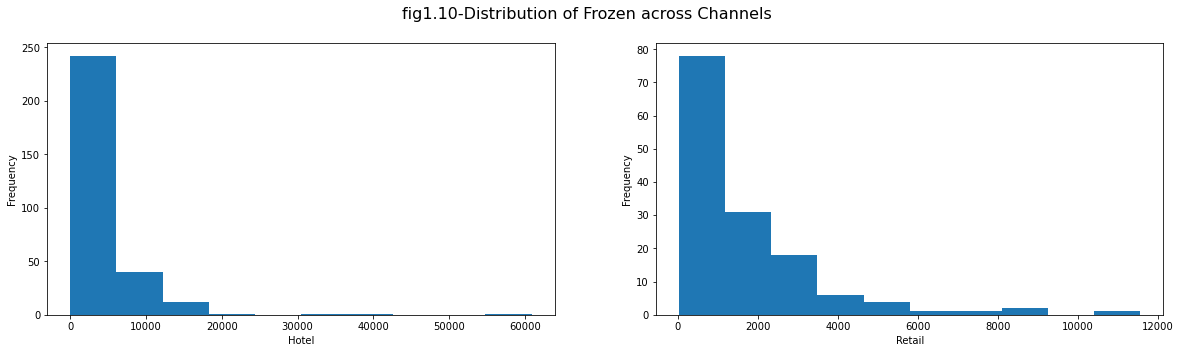

In [36]:
plt.figure(figsize=(20,5))
plt.suptitle('fig1.10-Distribution of Frozen across Channels',fontsize=16)
plt.subplot(1,2,1)
df_frozen1.get_group('Hotel').plot(kind = 'hist');
plt.xlabel('Hotel')
plt.subplot(1,2,2)
df_frozen1.get_group('Retail').plot(kind = 'hist');
plt.xlabel('Retail')


Text(0.5, 0, 'Retail')

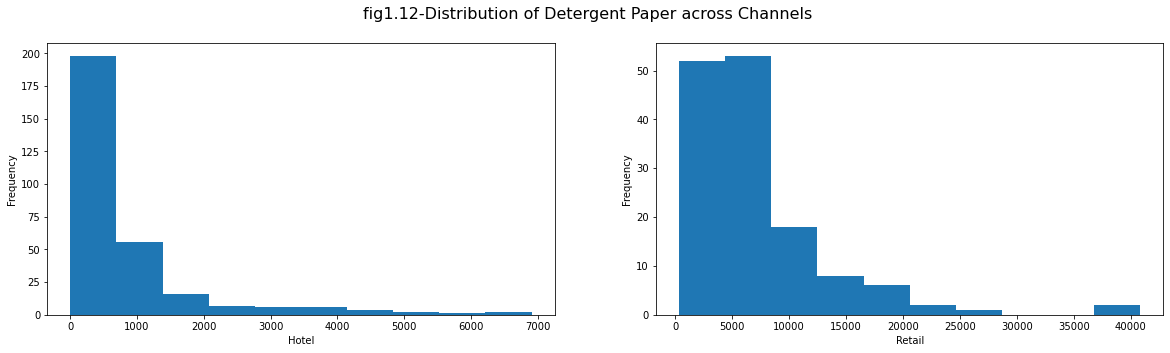

In [37]:
plt.figure(figsize=(20,5))
plt.suptitle('fig1.12-Distribution of Detergent Paper across Channels',fontsize=16)
plt.subplot(1,2,1)
df_detergent1.get_group('Hotel').plot(kind = 'hist');
plt.xlabel('Hotel')
plt.subplot(1,2,2)
df_detergent1.get_group('Retail').plot(kind = 'hist');
plt.xlabel('Retail')


Text(0.5, 0, 'Retail')

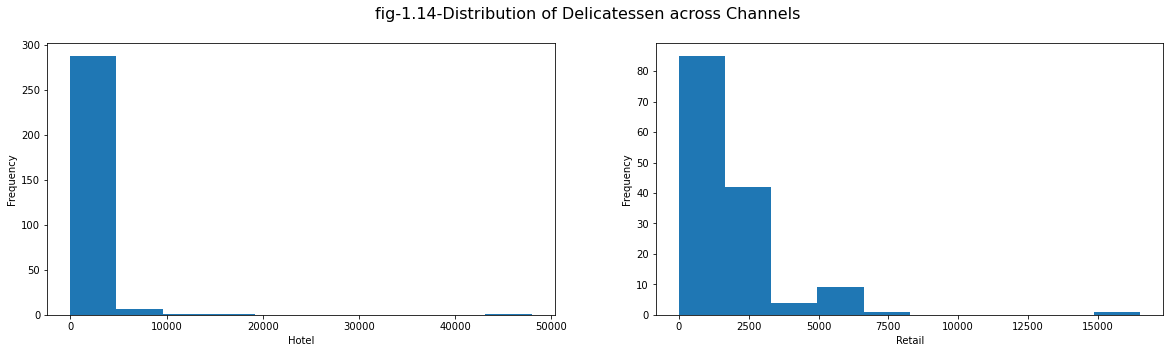

In [38]:
plt.figure(figsize=(20,5))
plt.suptitle('fig-1.14-Distribution of Delicatessen across Channels',fontsize=16)
plt.subplot(1,2,1)
df_delicate1.get_group('Hotel').plot(kind = 'hist');
plt.xlabel('Hotel')
plt.subplot(1,2,2)
df_delicate1.get_group('Retail').plot(kind = 'hist');
plt.xlabel('Retail')


## 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [39]:
df_descriptive=df.describe()

In [40]:
df_descriptive.loc['Cv',:]=df_descriptive.loc['std',:]/df_descriptive.loc['mean',:]
df_descriptive.iloc[:,1:7]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000
Cv,1.053918,1.273299,1.195174,1.580332,1.654647,1.849407


## 1.4 Are there any outliers in the data?

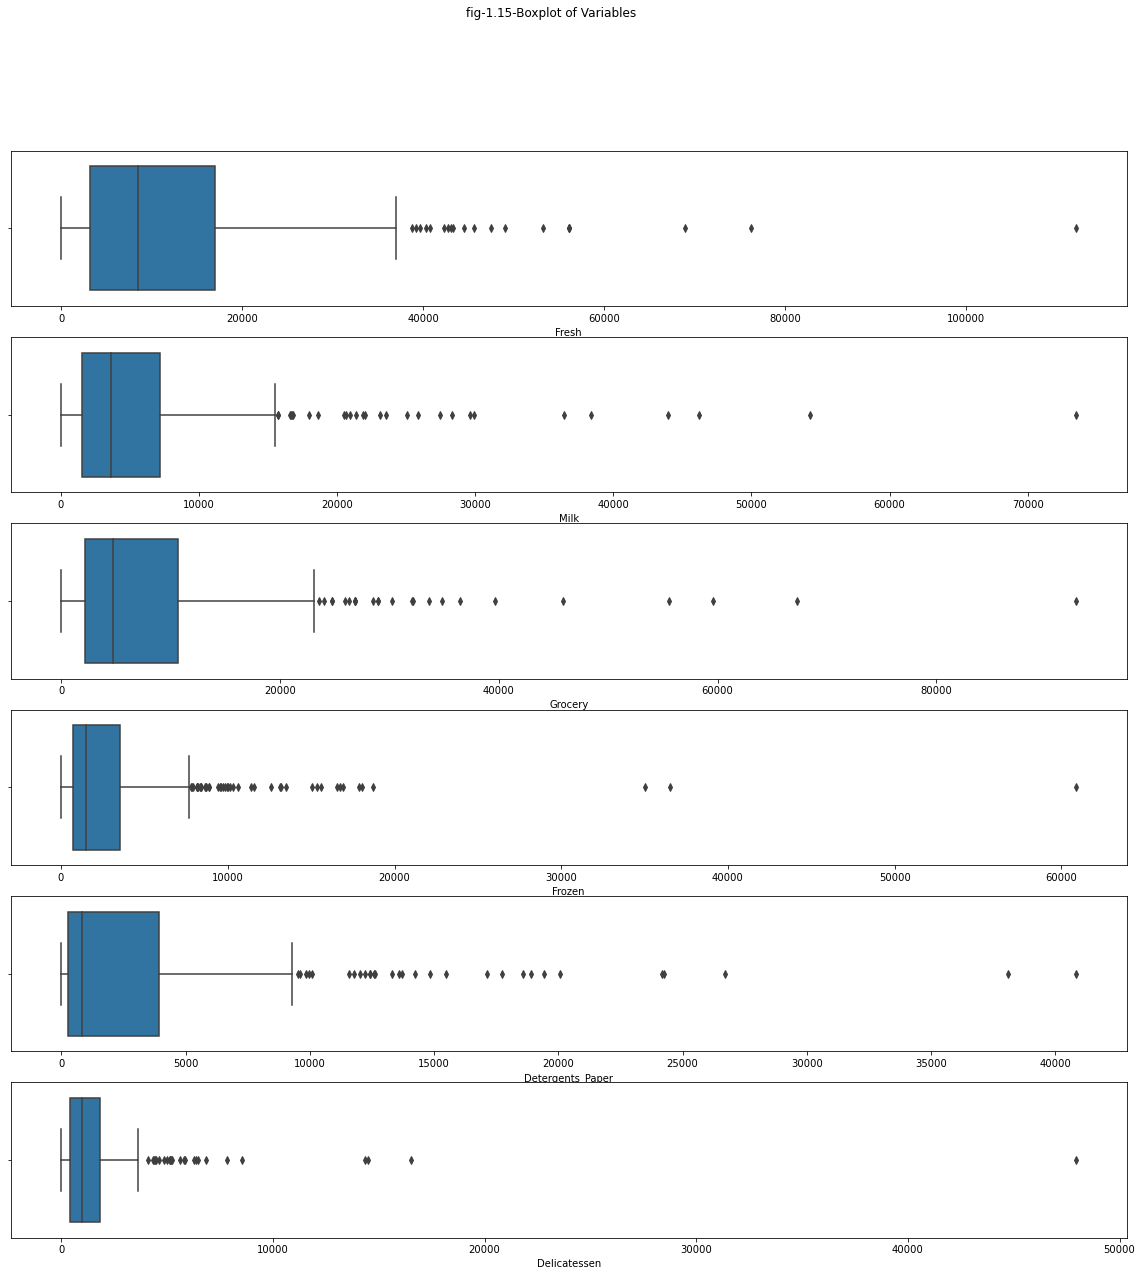

In [41]:
plt.figure(figsize=(20,20))
plt.suptitle('fig-1.15-Boxplot of Variables')
plt.subplot(6,1,1)
sns.boxplot(df.Fresh);
plt.subplot(6,1,2)
sns.boxplot(df.Milk);
plt.subplot(6,1,3)
sns.boxplot(df.Grocery);
plt.subplot(6,1,4)
sns.boxplot(df.Frozen);
plt.subplot(6,1,5)
sns.boxplot(df.Detergents_Paper);
plt.subplot(6,1,6)
sns.boxplot(df.Delicatessen);



## 1.5 On the basis of this report, what arethe recommendations?


## Problem 2

In [42]:
df2=pd.read_csv('Downloads/Survey-1.csv')
df2.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [44]:
df2.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

## 2.1.Forthisdata,construct thefollowingcontingency tables(KeepGenderasrowvariable)



## 2.1.1.GenderandMajor

In [45]:
con1=pd.crosstab(df2['Gender'],df2['Major'],margins='True')
con1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


## 2.1.2. Gender and Grad Intention

In [46]:
con2=pd.crosstab(df2['Gender'],df2['Grad Intention'],margins='True')
con2

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


## 2.1.3. Gender and Employment

In [47]:
con3=pd.crosstab(df2['Gender'],df2['Employment'],margins='True')
con3

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


## 2.1.4. Gender and Computer

In [48]:
con4=pd.crosstab(df2['Gender'],df2['Computer'],margins='True')
con4

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


## 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

## 2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [49]:
df2['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [50]:
len(df2['Gender'])

62

In [51]:
print('The probability that a randomly chosen CMSU student being male is',29/len(df2['Gender']))

The probability that a randomly chosen CMSU student being male is 0.46774193548387094


## 2.2.2.What is the probability that a randomly selected CMSU student will be female?

In [52]:
print('The probability that a randomly chosen CMSU student being female is',33/len(df2['Gender']))

The probability that a randomly chosen CMSU student being female is 0.532258064516129


## 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

## 2.3.1. Find the conditional probability of different majors among the male students in CMSU.




In [53]:
con1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [54]:
print('The probability of Accounting among male students is',4/29)
print('The probability of CIS among male students is',1/29)
print('The probability of Economics/Finance among male students is',4/29)
print('The probability of International Business among male students is',2/29)
print('The probability of Management among male students is',6/29)
print('The probability of Other among male students is',4/29)
print('The probability of Retailing/Marketing among male students is',5/29)
print('The probability of Undecided among male students is',3/29)

The probability of Accounting among male students is 0.13793103448275862
The probability of CIS among male students is 0.034482758620689655
The probability of Economics/Finance among male students is 0.13793103448275862
The probability of International Business among male students is 0.06896551724137931
The probability of Management among male students is 0.20689655172413793
The probability of Other among male students is 0.13793103448275862
The probability of Retailing/Marketing among male students is 0.1724137931034483
The probability of Undecided among male students is 0.10344827586206896


## 2.3.2 Find the conditional probability of different majors among the female students of CMSU.


In [55]:
con1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [56]:
print('The probability of Accounting among female students is',3/33)
print('The probability of CIS among female students is',3/33)
print('The probability of Economics/Finance among female students is',7/33)
print('The probability of International Business among female students is',4/33)
print('The probability of Management among female students is',4/33)
print('The probability of Other among female students is',3/33)
print('The probability of Retailing/Marketing among female students is',9/33)
print('The probability of Undecided among female students is',0/33)

The probability of Accounting among female students is 0.09090909090909091
The probability of CIS among female students is 0.09090909090909091
The probability of Economics/Finance among female students is 0.21212121212121213
The probability of International Business among female students is 0.12121212121212122
The probability of Management among female students is 0.12121212121212122
The probability of Other among female students is 0.09090909090909091
The probability of Retailing/Marketing among female students is 0.2727272727272727
The probability of Undecided among female students is 0.0


## 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

## 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.



In [57]:
con2

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [58]:
print("P(Graduate ∩ Male) = P (Graduate| Male) x P (male) = ",(17/29)*(29/62))

P(Graduate ∩ Male) = P (Graduate| Male) x P (male) =  0.27419354838709675


## 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

In [59]:
con4

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


In [60]:
print("P(NoLaptop ∩ Female) = P (NoLaptop| Female) x P (Female) = ",(4/33)*(33/62))

P(NoLaptop ∩ Female) = P (NoLaptop| Female) x P (Female) =  0.06451612903225806


## 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:



## 2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?



In [61]:
con3

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [62]:
print("P(Male U Full time) = P (Male) + P (Full time) - P(Male ∩ Full time ) =",(29/62)+(10/62)-(7/62))

P(Male U Full time) = P (Male) + P (Full time) - P(Male ∩ Full time ) = 0.5161290322580645


## 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [63]:
con1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


### P ((IB U Mg)| Female) = P (IB | Female) + P (Mg | Female)- P( (IB ∩ Mg)|Female)

In [64]:
print( "P ((IB U Mg)| Female) = P (IB | Female) + P (Mg | Female)- P( (IB ∩ Mg)|Female)=",(4/33)+(4/33))

P ((IB U Mg)| Female) = P (IB | Female) + P (Mg | Female)- P( (IB ∩ Mg)|Female)= 0.24242424242424243


## 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [65]:
con5=pd.crosstab(df2['Gender'],df2['Grad Intention'])
con5.drop(columns='Undecided',axis=1,inplace=True)
con5

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [66]:
print('P(Female)*P(GIyes)=',(20/40)*(28/40))

P(Female)*P(GIyes)= 0.35


In [67]:
print('P(Female ∩ GIyes)=',(11/40))

P(Female ∩ GIyes)= 0.275


In [68]:
print('This is not independent events as probability multiplication of both events is not equal to combined event, so being a female and graduate intention are not independent events.')

This is not independent events as probability multiplication of both events is not equal to combined event, so being a female and graduate intention are not independent events.


## 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

## Answer the following questions based on the data
## 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?



In [69]:
df2[df2['GPA']<3].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 59
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 17 non-null     int64  
 1   Gender             17 non-null     object 
 2   Age                17 non-null     int64  
 3   Class              17 non-null     object 
 4   Major              17 non-null     object 
 5   Grad Intention     17 non-null     object 
 6   GPA                17 non-null     float64
 7   Employment         17 non-null     object 
 8   Salary             17 non-null     float64
 9   Social Networking  17 non-null     int64  
 10  Satisfaction       17 non-null     int64  
 11  Spending           17 non-null     int64  
 12  Computer           17 non-null     object 
 13  Text Messages      17 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 2.0+ KB


In [70]:
df2_1=df2[df2['GPA']<3]
df2_1.reset_index()

,index,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
2,3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
3,4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
4,5,6,Female,22,Senior,Economics/Finance,Undecided,2.3,Unemployed,78.0,3,2,700,Laptop,30
5,10,11,Female,23,Senior,Economics/Finance,Yes,2.8,Full-Time,50.0,2,5,400,Laptop,200
6,23,24,Male,22,Senior,Undecided,Yes,2.6,Full-Time,45.0,1,5,400,Laptop,600
7,27,28,Female,20,Junior,International Business,Yes,2.9,Part-Time,50.0,3,1,900,Laptop,100
8,31,32,Male,20,Junior,Other,Yes,2.9,Part-Time,47.0,3,1,300,Laptop,300
9,33,34,Male,22,Senior,Retailing/Marketing,Yes,2.6,Full-Time,40.0,1,4,1400,Laptop,800


In [71]:
print("The probability of randomly chosen student's GPA is less than 3 is",17/62)

The probability of randomly chosen student's GPA is less than 3 is 0.27419354838709675


## 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.



In [72]:
con6=pd.crosstab(df2['Gender'],df2['Salary'],margins='True')
con6

Salary,25.0,30.0,35.0,37.0,37.5,40.0,42.0,45.0,47.0,47.5,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0,All
Gender,,,,,,,,,,,,,,,,,,,,
Female,0,5,1,0,1,5,1,1,0,1,5,0,0,5,5,0,1,1,1,33
Male,1,0,1,1,0,7,0,4,1,0,4,1,1,3,3,1,0,0,1,29
All,1,5,2,1,1,12,1,5,1,1,9,1,1,8,8,1,1,1,2,62


In [73]:
newdf2=df2[df2['Salary']>49]
newdf2.reset_index().head()

,index,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,5,6,Female,22,Senior,Economics/Finance,Undecided,2.3,Unemployed,78.0,3,2,700,Laptop,30
2,6,7,Female,21,Junior,Other,Undecided,3.0,Part-Time,50.0,1,3,500,Laptop,50
3,7,8,Female,22,Senior,Other,Undecided,3.1,Full-Time,80.0,1,2,200,Tablet,300
4,10,11,Female,23,Senior,Economics/Finance,Yes,2.8,Full-Time,50.0,2,5,400,Laptop,200


In [74]:
newdf2['Gender'].value_counts()

Female    18
Male      14
Name: Gender, dtype: int64

In [75]:
newdf2.describe(include='all')

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
count,32.000000,32,32.000000,32,32,32,32.000000,32,32.000000,32.000000,32.000000,32.000000,32,32.000000
unique,NaN,2,NaN,3,8,3,NaN,3,NaN,NaN,NaN,NaN,3,NaN
top,NaN,Female,NaN,Junior,Economics/Finance,Yes,NaN,Part-Time,NaN,NaN,NaN,NaN,Laptop,NaN
freq,NaN,18,NaN,15,8,16,NaN,21,NaN,NaN,NaN,NaN,28,NaN
mean,30.437500,NaN,21.062500,NaN,NaN,NaN,3.071875,NaN,57.781250,1.406250,3.625000,493.593750,NaN,245.781250
std,16.823443,NaN,1.702702,NaN,NaN,NaN,0.353995,NaN,8.597578,0.756024,1.338029,195.951913,NaN,196.276259
min,1.000000,NaN,18.000000,NaN,NaN,NaN,2.300000,NaN,50.000000,0.000000,1.000000,200.000000,NaN,0.000000
25%,18.750000,NaN,20.000000,NaN,NaN,NaN,2.900000,NaN,50.000000,1.000000,3.000000,337.500000,NaN,90.000000
50%,27.500000,NaN,21.000000,NaN,NaN,NaN,3.100000,NaN,55.000000,1.000000,4.000000,500.000000,NaN,200.000000
75%,42.250000,NaN,22.000000,NaN,NaN,NaN,3.300000,NaN,60.000000,2.000000,4.000000,600.000000,NaN,300.000000


In [135]:
#By Bayes Theory
print('P1 (Salary>=50 | male)= P ( male | Salary>=50) * P (Salary>=50) / P ( male) ')
print('The Conditional Probability P1(Salary>=50 | male)=',(14/32)*(32/62) / (29/62))
                                                               
                                                            


P1 (Salary>=50 | male)= P ( male | Salary>=50) * P (Salary>=50) / P ( male) 
The Conditional Probability P1(Salary>=50 | male)= 0.4827586206896552


In [137]:
#By Bayes Theory
print('P2 (Salary>=50 | female)= P (female | Salary>=50) * P (Salary>=50) / P (female) ')
print('The Conditional Probability P2(Salary>=50 |female)=',(18/32)*(32/62) / (33/62))
                                              

P2 (Salary>=50 | female)= P (female | Salary>=50) * P (Salary>=50) / P (female) 
The Conditional Probability P2(Salary>=50 |female)= 0.5454545454545454


## 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

In [138]:
#H0:Normally distributed
#H1:Not Normally distributed

In [139]:
df2['GPA'].describe()

count    62.000000
mean      3.129032
std       0.377388
min       2.300000
25%       2.900000
50%       3.150000
75%       3.400000
max       3.900000
Name: GPA, dtype: float64

In [140]:
df2['GPA'].mode()

0    3.0
1    3.1
2    3.4
dtype: float64

In [141]:
df2['GPA'].mode()

0    3.0
1    3.1
2    3.4
dtype: float64

Text(0.5, 1.0, 'fig 2.1-GPA distribution')

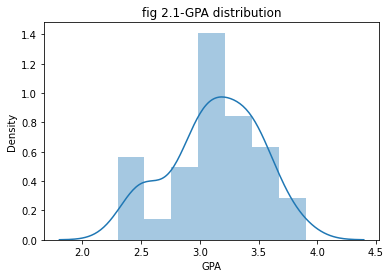

In [142]:
sns.distplot(df2['GPA']);
plt.title('fig 2.1-GPA distribution')

In [143]:
df2[(df2['GPA']<3.129-3*0.377) | (df2['GPA']>3.129+3*0.377)]

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages


In [144]:
stats.shapiro(df2['GPA'])

ShapiroResult(statistic=0.9685361981391907, pvalue=0.11204058676958084)

In [145]:
print("Since the p value > alpha we don't have sufficient evidence to reject null hypothesis")
print('The variable GPA is normally distibuted')

Since the p value > alpha we don't have sufficient evidence to reject null hypothesis
The variable GPA is normally distibuted


In [146]:
df2['Salary'].describe()

count    62.000000
mean     48.548387
std      12.080912
min      25.000000
25%      40.000000
50%      50.000000
75%      55.000000
max      80.000000
Name: Salary, dtype: float64

In [147]:
df2['Salary'].mode()

0    40.0
dtype: float64

Text(0.5, 1.0, 'fig 2.2-Salary distribution')

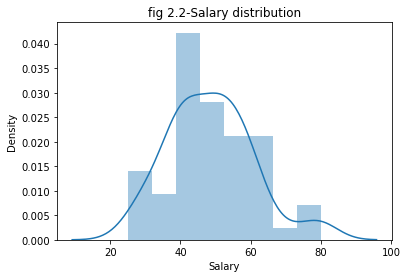

In [148]:
sns.distplot(df2['Salary']);
plt.title('fig 2.2-Salary distribution')

In [149]:
df2[(df2['Salary']<48.548-3*12.080) | (df2['Salary']>48.548+3*12.080)]

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages


In [150]:
stats.shapiro(df2['Salary'])

ShapiroResult(statistic=0.9565857648849487, pvalue=0.028001394122838974)

In [151]:
print("Since the p value < alpha we  have sufficient evidence to reject null hypothesis")
print('The variable Salary  is not normally distibuted')

Since the p value < alpha we  have sufficient evidence to reject null hypothesis
The variable Salary  is not normally distibuted


In [152]:
df2['Spending'].describe()

count      62.000000
mean      482.016129
std       221.953805
min       100.000000
25%       312.500000
50%       500.000000
75%       600.000000
max      1400.000000
Name: Spending, dtype: float64

In [153]:
df2['Spending'].mode()

0    500
dtype: int64

Text(0.5, 1.0, 'fig 2.3-Spending distribution')

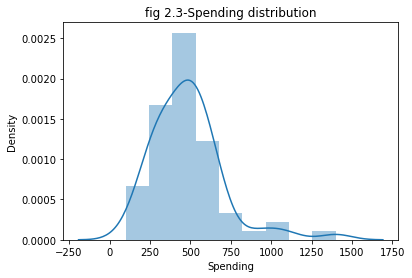

In [154]:
sns.distplot(df2['Spending']);
plt.title('fig 2.3-Spending distribution')


In [155]:
df2[(df2['Spending']<482.016-3*221.95) | (df2['Spending']>482.016+3*221.95)]

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
33,34,Male,22,Senior,Retailing/Marketing,Yes,2.6,Full-Time,40.0,1,4,1400,Laptop,800


In [156]:
stats.shapiro(df2['Spending'])

ShapiroResult(statistic=0.8777452111244202, pvalue=1.6854661225806922e-05)

In [157]:
print("Since the p value < alpha we  have sufficient evidence to reject null hypothesis")
print('The variable Spending  is not normally distibuted')

Since the p value < alpha we  have sufficient evidence to reject null hypothesis
The variable Spending  is not normally distibuted


In [158]:
df2['Text Messages'].describe()

count     62.000000
mean     246.209677
std      214.465950
min        0.000000
25%      100.000000
50%      200.000000
75%      300.000000
max      900.000000
Name: Text Messages, dtype: float64

In [159]:
df2['Text Messages'].mode()

0    300
dtype: int64

Text(0.5, 1.0, 'fig 2.4-Text Messages distribution')

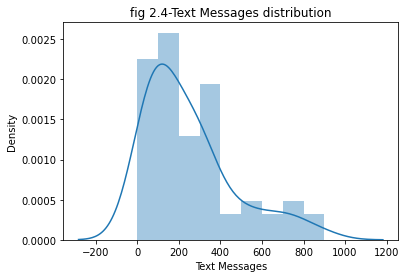

In [160]:
sns.distplot(df2['Text Messages']);
plt.title('fig 2.4-Text Messages distribution')

In [161]:
df2[(df2['Text Messages']<246.209-3*214.46) | (df2['Text Messages']>246.209+3*214.46)]

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
43,44,Female,21,Senior,Retailing/Marketing,No,3.9,Part-Time,30.0,1,5,100,Laptop,900


In [162]:
stats.shapiro(df2['Text Messages'])

ShapiroResult(statistic=0.8594191074371338, pvalue=4.324040673964191e-06)

In [163]:
print("Since the p value < alpha we  have sufficient evidence to reject null hypothesis")
print('The variable Text Messages  is not normally distibuted')

Since the p value < alpha we  have sufficient evidence to reject null hypothesis
The variable Text Messages  is not normally distibuted


In [164]:
df3=pd.read_csv('Downloads/A+&+B+shingles (1).csv')

In [165]:
df3.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [166]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [167]:
df3.isnull().sum()

A    0
B    5
dtype: int64

In [168]:
df3.describe()

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


### 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

In [169]:
!pip install scipy --upgrade

In [170]:
##H0 : mean moisture content <=0.35
##HA : mean moisture content > 0.35
# Assume alpha = 0.05

In [171]:
import statsmodels.stats.api as sm


In [172]:
tstatA,p_valueA = stats.ttest_1samp(df3['A'],0.35,alternative='greater')

In [173]:
print('p value for sampleA=',p_valueA)

p value for sampleA= 0.9252236685509249


In [174]:
#since p value of sample A is greater than alpha.we have no evidence to reject null hypothessis

In [175]:
tstatB,p_valueB = stats.ttest_1samp(df3['B'],0.35,alternative='greater',nan_policy='omit')

In [176]:
print('p value for sampleB=',p_valueB)

p value for sampleB= 0.9979095225996808


In [177]:
#since p value of sample B is greater than alpha we have no evidence to reject null hypothessis

In [178]:
print('Thus the mean moisture contents in both types of shingles are within the permissible limits ')

Thus the mean moisture contents in both types of shingles are within the permissible limits 


### 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [179]:
##H0 : population mean for shingles A=population mean for shingles B
##HA : population mean for shingles A != population mean for shingles B
## Independent Two sample ttest can be done on A & B samples 
# Assume alpha = 0.05

In [180]:
stats.levene(df3['A'],df3['B'].dropna())

LeveneResult(statistic=0.23808965111555147, pvalue=0.6272312061867605)

In [181]:
tstat2,pval2=stats.ttest_ind(df3['A'],df3['B'],nan_policy='omit')

In [182]:
print('pval2',pval2)

pval2 0.2017496571835328


In [183]:
print(tstat2)

1.2896282719661123


In [184]:
#since p value of samples is greater than alpha we have no evidence to reject null hypothessis

In [185]:
print('Thus the population mean contents in both types of shingles are equal')

Thus the population mean contents in both types of shingles are equal


Text(0.5, 1.0, 'fig 3.1-Sample Moisture content in shingle A')

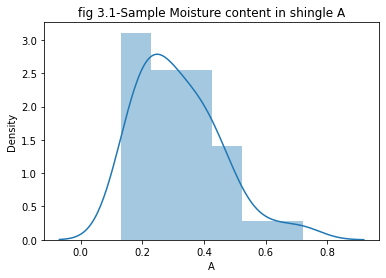

In [186]:
sns.distplot(df3['A']);
plt.title('fig 3.1-Sample Moisture content in shingle A')

Text(0.5, 1.0, 'fig 3.2-Sample Moisture content in shingle B')

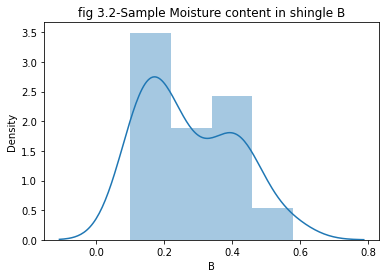

In [187]:
sns.distplot(df3['B']);
plt.title('fig 3.2-Sample Moisture content in shingle B')